# simple regression

## import

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## dataset

In [4]:
x_data = np.linspace(0.0, 10.0, 10**6)
noise = np.random.randn(len(x_data))
x_data[:10]

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05,
         3.00000300e-05,   4.00000400e-05,   5.00000500e-05,
         6.00000600e-05,   7.00000700e-05,   8.00000800e-05,
         9.00000900e-05])

y = mx + b

b = 5

In [5]:
slope = 0.5
y_intercept = 5
y_true = slope * x_data + 5 + noise
y_true[:10]

array([ 6.434546  ,  4.36375352,  6.75015526,  4.72560018,  6.18410417,
        3.10230978,  5.24147238,  4.86870934,  5.08199323,  4.23604936])

## integrating pandas

In [6]:
df_x = pd.DataFrame(data=x_data, columns=["x"])
df_x.head(3)

,x
0,0.00000
1,0.00001
2,0.00002


In [8]:
df_y = pd.DataFrame(data=y_true, columns=["y"])
df_y.head(3)

,y
0,6.434546
1,4.363754
2,6.750155


In [12]:
df = pd.concat([df_x, df_y], axis=1)
df.head(3)

,x,y
0,0.00000,6.434546
1,0.00001,4.363754
2,0.00002,6.750155


## plotting the data

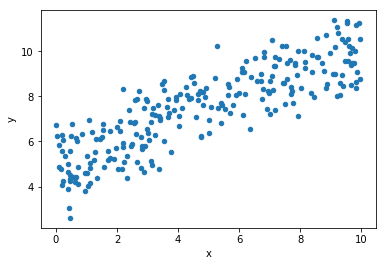

In [16]:
df.sample(n=250).plot(kind="scatter", x="x", y="y")

## batching

In [28]:
batch_size = 8
initial_weight_and_bias = np.random.randn(2)
initial_weight_and_bias

array([ 0.72905927,  0.29410928])

### variables and placeholders

In [33]:
weight_var = tf.Variable(initial_weight_and_bias[0], dtype=tf.float32)
bias_var = tf.Variable(initial_weight_and_bias[1], dtype=tf.float32)
x_ph = tf.placeholder(tf.float32, [batch_size])
y_ph = tf.placeholder(tf.float32, [batch_size])

### operations

In [60]:
y_pred = tf.add(tf.multiply(weight_var, x_ph), bias_var)

### loss function

In [61]:
error = tf.reduce_sum(tf.square(y_ph - y_pred))

### optimizer

In [62]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

### variable initialiation

In [63]:
init = tf.global_variables_initializer()

### running the session

In [66]:
with tf.Session() as sess:
    sess.run(init)
    
    #batching
    batches = 1000
    for i in range(batches):
        rand_idx = np.random.randint(low=0, high=len(x_data), size=batch_size)
        feed_dict = {
            x_ph: x_data[rand_idx],
            y_ph: y_true[rand_idx]
        }
        sess.run(train, feed_dict=feed_dict)
        
    model_weight, model_bias = sess.run([weight_var, bias_var])
"weight: {}, bias: {}".format(model_weight, model_bias)

'weight: 0.5284059643745422, bias: 4.9393157958984375'

## plotting the results

In [75]:

y_model = model_weight * x_space + model_bias

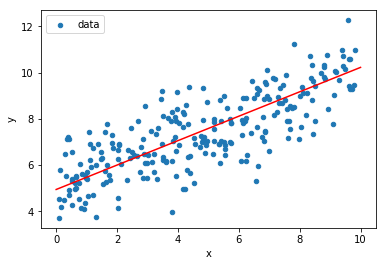

In [76]:
df.sample(250).plot(kind="scatter", x="x", y="y", label="data")
plt.plot(x_space, y_model, label="model", color="red")